The first step in our exploratory analysis is to load the data set. The training data set is in a json format so we will use the pandas package functions to read the file. 

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set(style="whitegrid", color_codes=True)

fileName = "C:\\Users\\sevda\\Documents\\Data Lab\\Six sigma rental property\\train.json\\train.json"
train_df = pd.read_json(fileName)

train_df.head()


,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue
10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",low,40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue
100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",high,40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,2850,241 W 13 Street
100007,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,"[Hardwood Floors, No Fee]",low,40.7539,6888711,-73.9677,1067e078446a7897d2da493d2f741316,[https://photos.renthop.com/2/6888711_6e660cee...,3275,333 East 49th Street
100013,1.0,4,0,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,[Pre-War],low,40.8241,6934781,-73.9493,98e13ad4b495b9613cef886d79a6291f,[https://photos.renthop.com/2/6934781_1fa4b41a...,3350,500 West 143rd Street


We can see from the print out tha that the dataset contains the 15 initilaly described variables. Further we can see 

In [9]:

train_df.shape

(49352, 15)

As a next step we will permorm some exploratory analysis on the variables provided in the data set. We have 14 independent variables provided in the dataset. Our dependent variable is called an interest_level and represents the levels in which the 

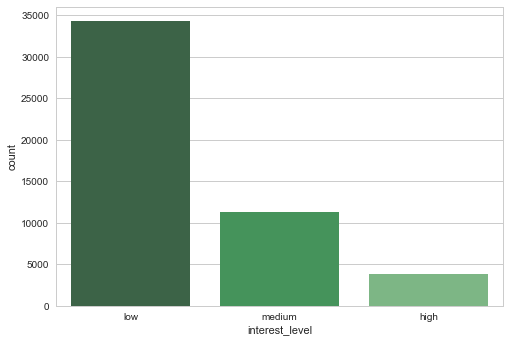

In [53]:
sns.countplot(x="interest_level", data=train_df, palette="Greens_d", order = ["low", "medium", "high"]);

plt.show()

We can see that the rental listing with low interest represent the majority of the rental listings in the dataset. The next are the rental listings with medium level of interest and the minority are the listings with high level of interest. We will also look at the distribution of the independent variables and how the independent variables relate to our target variable.

As we already noted we have a couple of numeric variables. We will explore the numer of bedrooms, number of bathrooms and price together.

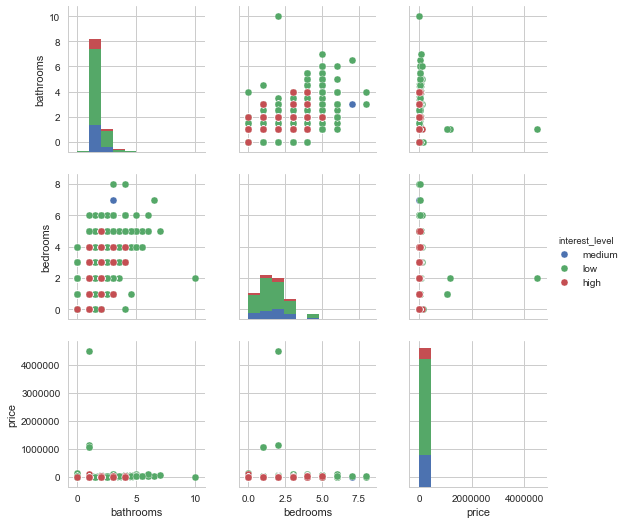

In [54]:

sns.pairplot(train_df[['bathrooms','bedrooms', 'price', "interest_level"]], hue="interest_level")

plt.show()

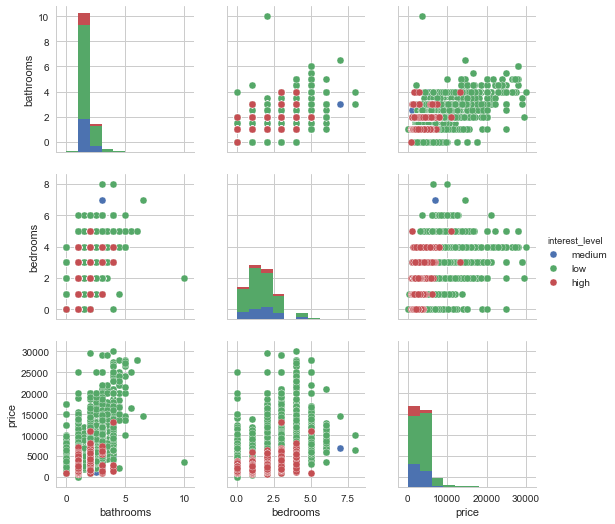

In [4]:
train_clean_df = train_df[train_df['price'] < 30000]

sns.pairplot(train_clean_df[['bathrooms','bedrooms', 'price', "interest_level"]], hue="interest_level")

plt.show()

Based on the plots, we can see that the majority of the rental units have 2 bathrooms with some rentals having 3 bathrooms. The bedrooms vary more compared to the bathrooms and range between 0 and 8. There is some correlation existing between the number of bedrooms and number of bathrooms. With the increase in the number of bedrooms we can observe an increase in the number of bedrooms. From the price variable, we can see that there are a umber of outliers with extremely high rent. In the future analysis, we may consider removing the outliers in order to improve our model.

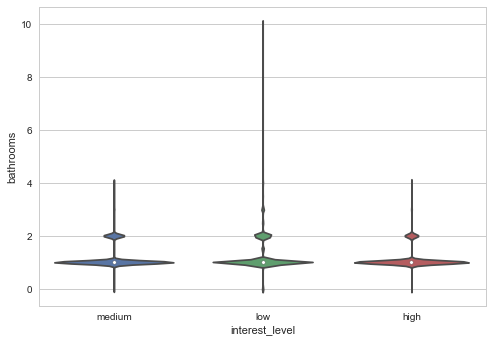

In [9]:
sns.violinplot(x="interest_level", y="bathrooms", data=train_clean_df);
plt.show()

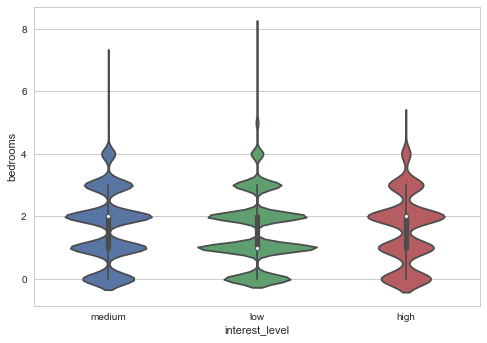

In [10]:
sns.violinplot(x="interest_level", y="bedrooms", data=train_clean_df);
plt.show()

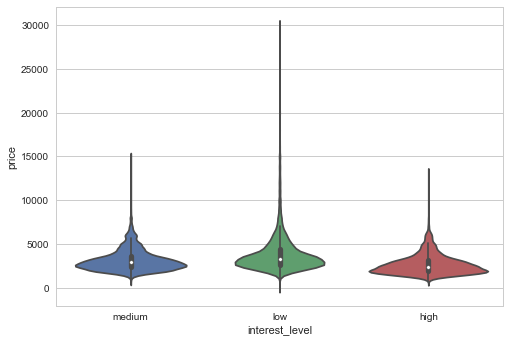

In [11]:
sns.violinplot(x="interest_level", y="price", data=train_clean_df);
plt.show()

Now we will explore the longitude and the langitude of the data set or in other words, we will focus on the location of the rental properties. Before plotting we will replace the marginal properties which lie beyond the 99% and 1% of the longitude values and beyound the 99% and 1% of the latitude values.

In [ ]:
sns.distplot(train_df['longitude'], kde=False, rug=True)
sns.plt.show()


In [7]:
lower_limit_lon = np.percentile(train_df.longitude.values, 1)
upper_limit_lon = np.percentile(train_df.longitude.values, 99)
train_df['longitude'].ix[train_df['longitude']<lower_limit_lon] = lower_limit_lon
train_df['longitude'].ix[train_df['longitude']>upper_limit_lon] = upper_limit_lon

lower_limit_lat = np.percentile(train_df.latitude.values, 1)
upper_limit_lat = np.percentile(train_df.latitude.values, 99)
train_df['latitude'].ix[train_df['latitude']<lower_limit_lat] = lower_limit_lat
train_df['latitude'].ix[train_df['latitude']>upper_limit_lat] = upper_limit_lat





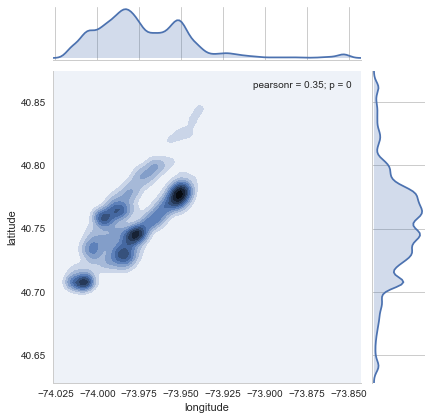

In [9]:
sns.jointplot(x="longitude", y="latitude", data=train_df, kind="kde");

sns.plt.show()

Based on the plot, we can see that the rental units are condensed around few areas and form kernels with high numbers of rental units offered in that areas. Based on the longitude and latitude values that we have plotted on the map, we can conclude that the information for rental units comes from New York and more specifically from Manhattan. In order to improve the visualization of the data, we will use Basemap.

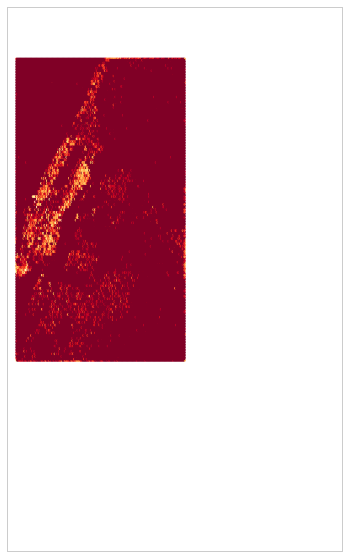

In [29]:

from mpl_toolkits.basemap import Basemap
from matplotlib import cm

west, south, east, north = -74.02, 40.64, -73.85, 40.86

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
m = Basemap(projection='merc', llcrnrlat=south, urcrnrlat=north,
            llcrnrlon=west, urcrnrlon=east, lat_ts=south, resolution='h')
x, y = m(train_df['longitude'].values, train_df['latitude'].values)
m.hexbin(x, y, gridsize=200,
         bins='log', cmap=cm.YlOrRd_r);

plt.show()

The Basemap plot confirms the observations that there are few areas with higher number of rental units. And between them there is an empty area with no units available for rent and that area corresponds to Central Park. As a next step we will transform the data longitude and latitude values into New York neighbourhoods. For that purpose we will use zillow data which contains information on each neighbourhood in NY. The neighbourhood is defined by the West, Est, South and North positions. Our purpose is to compare whether certain rental unit is within a defined region. If not, we will assign value "Other".

In [133]:
import shapefile

sf = shapefile.Reader("C:\\Users\\sevda\\Documents\\Data Lab\\Six sigma rental property\\ZillowNeighborhoods-NY\\ZillowNeighborhoods-NY.shp")

shapes = sf.shapes()
records = sf.records()

towns_values = [records[i][2] for i in range(len(records))]
neighb_values = [records[i][3] for i in range(len(records))]
west_values = [shapes[i].bbox[0] for i in range(len(records))]
south_values = [shapes[i].bbox[1] for i in range(len(records))]
east_values = [shapes[i].bbox[2] for i in range(len(records))]
north_values = [shapes[i].bbox[3] for i in range(len(records))]

west, south, east, north = -74.02, 40.64, -73.85, 40.86

neighbourhood_pd = pd.DataFrame({'Town' : towns_values,
                                 'Neighbourhood' : neighb_values,
                                 'West' : west_values,
                                 'South' : south_values,
                                 'East' : east_values,
                                 'North' : north_values})

neighbourhood_pd = neighbourhood_pd[neighbourhood_pd.Town == "New York"]
neighbourhood_pd = neighbourhood_pd.ix[(neighbourhood_pd.West >= west) & 
                                     (neighbourhood_pd.East <= east) & 
                                     (neighbourhood_pd.South >= south) & 
                                     (neighbourhood_pd.North <= north)]

neighbourhood_sorted_pd = neighbourhood_pd.sort_values(['West'])


neighbourhood_ls = []
for num in range(0, train_df.shape[0]):
    temp = neighbourhood_sorted_pd[(neighbourhood_sorted_pd.West<train_df.longitude.values[num]) &
                                   (neighbourhood_sorted_pd.East>train_df.longitude.values[num]) &
                                   (neighbourhood_sorted_pd.South<train_df.latitude.values[num]) &
                                   (neighbourhood_sorted_pd.North>train_df.latitude.values[num])]
    if temp.shape[0] > 0:
        neighbourhood_ls += [temp.Neighbourhood.values[0]]
    else:
        neighbourhood_ls += ["Other"]
    
train_df['neighbourhood'] = pd.Series(neighbourhood_ls, index=train_df.index)

We are now working with the initial data set plus one additional variable describing the data called "neighbourhood". Next, we will explore how the neighbourhood is related to the interest level of the rental unit.

In [141]:
train_grouped_df = train_df.groupby(['neighbourhood', 'interest_level']).count()

In [143]:
print(train_grouped_df)

                                   bathrooms  bedrooms  building_id  created  \
neighbourhood      interest_level                                              
Astoria            high                   90        90           90       90   
                   low                   209       209          209      209   
                   medium                182       182          182      182   
Bedford Stuyvesant high                   62        62           62       62   
                   low                   354       354          354      354   
                   medium                126       126          126      126   
Boerum Hill        high                    4         4            4        4   
                   low                   112       112          112      112   
                   medium                 37        37           37       37   
Brooklyn Heights   high                    9         9            9        9   
                   low                  